In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
plt.rcParams["figure.dpi"] = 120

In [32]:
data_dir = "../data"

In [40]:
df = pd.read_pickle(f"{data_dir}/full/bert_results_719235.pkl")

In [41]:
df

,text,label,uncertainty_before,uncertainty_after,uncertainty_difference,label_name
0,Fears for T N pension after talks Unions repre...,2,35.943447,50.990791,15.047344,Business
1,The Race is On: Second Private Team Sets Launc...,3,40.539799,54.039967,13.500168,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,43.922169,60.622318,16.700150,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,52.632397,65.712761,13.080364,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,63.364487,71.481964,8.117477,Sci/Tech
...,...,...,...,...,...,...
7595,Around the world Ukrainian presidential candid...,0,100334.992188,54480.062500,-45854.929688,World
7596,Void is filled with Clement With the supply of...,1,100345.140625,54484.457031,-45860.683594,Sports
7597,Martinez leaves bitter Like Roger Clemens did ...,1,100356.992188,54491.351562,-45865.640625,Sports
7598,5 of arthritis patients in Singapore take Bext...,2,100366.031250,54496.496094,-45869.535156,Business


In [42]:
df_melted = df[["label_name", "uncertainty_before", "uncertainty_after"]].melt(
    id_vars=["label_name"],
    value_vars=["uncertainty_before", "uncertainty_after"],
    var_name="type",
    value_name="uncertainty",
)
df_melted["type"] = df_melted["type"].map(
    {
        "uncertainty_before": "Before",
        "uncertainty_after": "After",
    }
)

df_melted

,label_name,type,uncertainty
0,Business,Before,35.943447
1,Sci/Tech,Before,40.539799
2,Sci/Tech,Before,43.922169
3,Sci/Tech,Before,52.632397
4,Sci/Tech,Before,63.364487
...,...,...,...
15195,World,After,54480.062500
15196,Sports,After,54484.457031
15197,Sports,After,54491.351562
15198,Business,After,54496.496094


<Axes: xlabel='label_name', ylabel='uncertainty'>

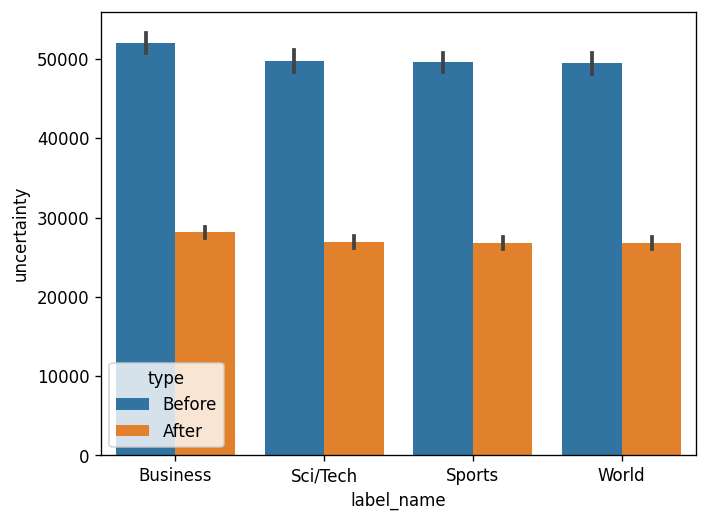

In [43]:
sns.barplot(data=df_melted, x="label_name", y="uncertainty", hue="type")

<Axes: xlabel='label_name', ylabel='uncertainty_difference'>

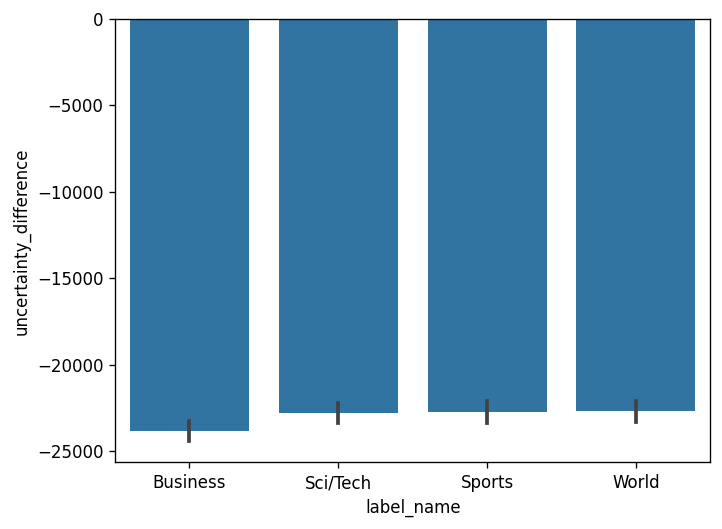

In [44]:
sns.barplot(data=df, x="label_name", y="uncertainty_difference")